important points
- regression, linear regression, support vector machine??, Gyan, CNN, RNN
- Machine learning model can be a mathematical representation of a real world process
- Artificial Intelligence ⊇ Machine Learning ⊇ Deep Learning
- Supervised, Unsupervised, (Semi-supervised), Reinforcement Learning
- Supervised Learning => data with label 
- Unsupervised Learning => data without label, but dividing data into clusters in which 1 cluster share similar properties from within 
- Market/Basket Analysis !!, Association technique in contrast with clustering technique in Unsupervised Learning 
- Apriori Algorithm uses conditional probability, check it out
- Supervised Learning
    - Classification, 
    - Regression (used only if the output is numerical, quantitative data) 

# Linear Regression

- Correlation helps to check whether two variable are related or not, if they are they identityf the type and degree 
- Regression helps to retrieve the exact mathematical correlation between the two variables
- Simple Linear Regression 
    - y = l + mx
    - l and m found by regression models 
    - y is the dependent and x is the independent 
- Multiple Linear Regression 
    - y = k0 + k1x1 + k2x2 + .... + knxn
    - more than one independent variable
- Replace missing values in data field by the average value of that coulumn by the method (for numerical values only):
    - `pandas_object.fillna(mean/mode/median of that column, inplaces=True)` !check for validation
- To detect outliers, the easiest way is to make a boxplot. It is very important to remove outliers
- Check more about residual and error analysis 
- In any statistical method, if P value is less than 0.05, we reject the hypothesis ???
- There are many methods under cross validation, one method is Leave-one-out
    - make a model by removing 1st 4 values and predict all the necessary stuff
    - Make a 2nd model by removing 2nd 4 values and predict all the necessary stuff 
    - continue the process 
    - We get 4 models
    - if the average of rmes value of 4 models is better than original value, then we take the cross validation model for future use

## Developing a model to predict yield based on input temperature and time
Note: y(yield) = k1 + k2(Time) + k2(Temperature)

In [1]:
import pandas as mypd
import matplotlib.pyplot as plt
import seaborn as mysb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#### Cross Validation (cross_val_score)
- Leaving out different sets of data and training models based on the left out sets, taking the average of the score and if it is better than the original then we can proceed with the latest one instead of the original

In [2]:
mydata = mypd.read_csv("Mult_Reg_Yield.csv")
mydata

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [3]:
#to check missing values
mydata.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


In [4]:
#delete rows with missing values
mydata.dropna()

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


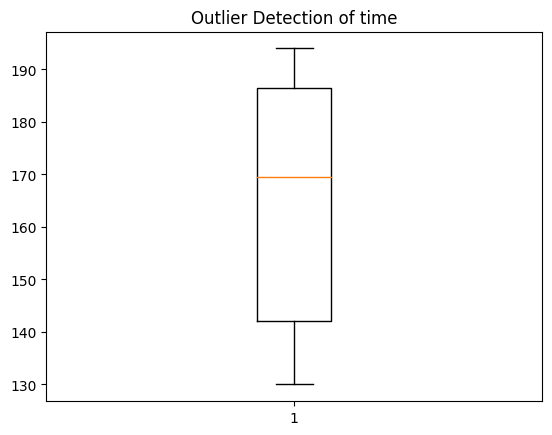

In [5]:
#outlier detection by making boxplot
plt.boxplot(mydata["Time"])
plt.title("Outlier Detection of time")
plt.show()

In [6]:
#name all the independent variables and avoid the dependent variable, which we have to find
x = mydata.iloc[:,0:2]
x

,Time,Temperature
0,130,190
1,174,176
2,134,205
3,191,210
4,165,230
5,194,192
6,143,220
7,186,235
8,139,240
9,188,230


In [7]:
#retrieveing the dependent variable
y = mydata.Yield
y

0     35.0
1     81.7
2     42.5
3     98.3
4     52.7
5     82.0
6     34.5
7     95.4
8     56.7
9     84.4
10    94.3
11    44.3
12    83.3
13    91.4
14    43.5
15    51.7
Name: Yield, dtype: float64

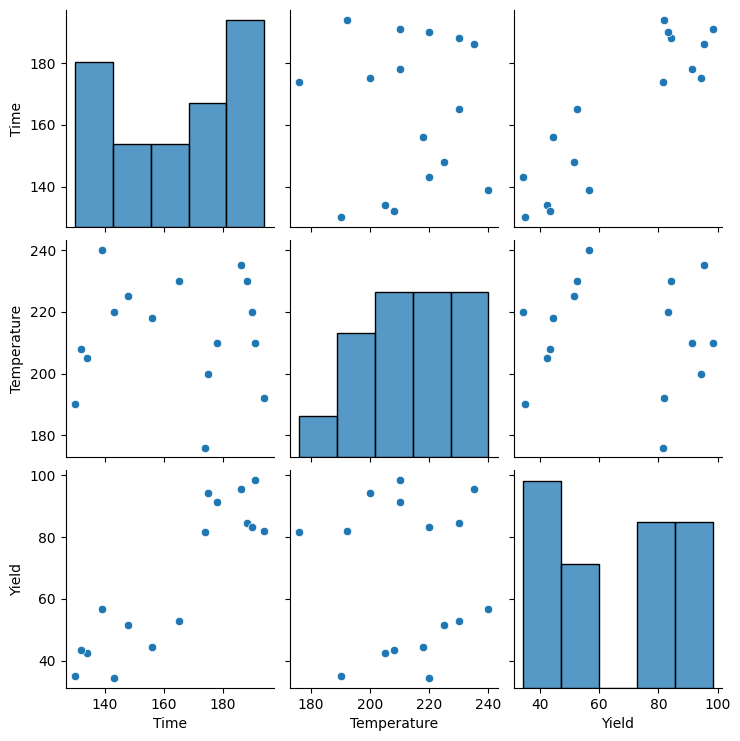

In [8]:
#exploring the data
plotting = mysb.pairplot(mydata)
plotting

In [9]:
#regressiong modelling 
mymodel = LinearRegression()
mymodel

LinearRegression()

In [10]:
mymodel = mymodel.fit(x,y)
mymodel

LinearRegression()

In [11]:
# to get the coefficients of the equation of linear regression 
coeff = mymodel.coef_
intercept = mymodel.intercept_
print(coeff)
print(intercept)

[ 0.90608862 -0.06418911]
-67.8843597036845


In [12]:
# Model accuracy-R Square value
rsq = mymodel.score(x,y)
rsq
round(rsq*100,2)

80.64

In [13]:
#predictedvalue
pred = mymodel.predict(x)
pred

array([37.71122898, 78.47777573, 40.37274675, 91.69885237, 66.85676605,
       95.57252226, 47.5647076 , 85.56368144, 42.65657086, 87.69680424,
       77.84332562, 59.47223785, 90.15087261, 79.91970034, 38.36800217,
       51.77420512])

In [14]:
#error detection, mean square error
mse = mean_squared_error(y, pred)
mse

102.00508614219636

In [15]:
#root mean square value for error
import math as mymath
rmse = mymath.sqrt(mse)
rmse

10.099756736783137

In [16]:
# Residual Analysis
res = y-pred
res

0     -2.711229
1      3.222224
2      2.127253
3      6.601148
4    -14.156766
5    -13.572522
6    -13.064708
7      9.836319
8     14.043429
9     -3.296804
10    16.456674
11   -15.172238
12    -6.850873
13    11.480300
14     5.131998
15    -0.074205
Name: Yield, dtype: float64

In [17]:
pred=mypd.DataFrame(pred,columns=['Predicted'])
pred

,Predicted
0,37.711229
1,78.477776
2,40.372747
3,91.698852
4,66.856766
5,95.572522
6,47.564708
7,85.563681
8,42.656571
9,87.696804


In [18]:
myresult=mydata.join(pred)
myresult

,Time,Temperature,Yield,Predicted
0,130,190,35.0,37.711229
1,174,176,81.7,78.477776
2,134,205,42.5,40.372747
3,191,210,98.3,91.698852
4,165,230,52.7,66.856766
5,194,192,82.0,95.572522
6,143,220,34.5,47.564708
7,186,235,95.4,85.563681
8,139,240,56.7,42.656571
9,188,230,84.4,87.696804


In [19]:
# time = int(input('enter time: '))
# temp = int(input('enter temp: '))
# # print(intercept)
# print("Yield = ",intercept + coeff[0]*time + coeff[1]*temp)

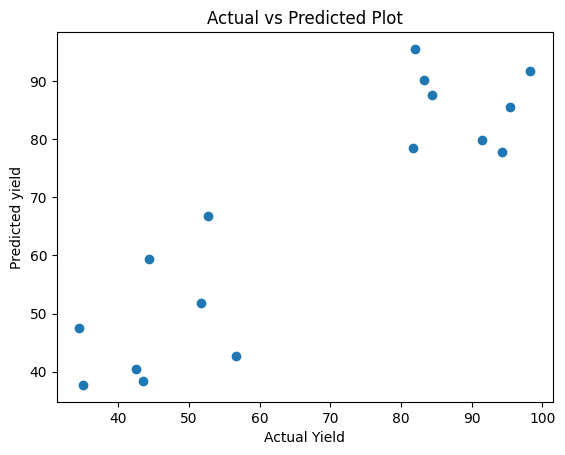

In [20]:
# mymodel.summary()
# Normality test using pp plot, plotting original and expected value
#Residual Analysis – Actual Vs Predicted Plot
plt.scatter(y, pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted yield")
plt.show()

# Logistical Regression
- It is based on a function called sigmoid function 
- k(z) = 1/(1+e^(-z)) called as sigmoid as z
- If z is -infinity, we get k(z) = 0 
- If z is infinity, we get k(z) = 1
- Here prediction is based on probability 
- Deep learning basics can be considered as 
    - linear + logistic regression 
- After putting all the independent variables, the outcome would probably be yes/no
- If a user will pay for an app or not, We can take logistic Regression by taking appropriate inputs like age, income, gender
- By taking temperature, pressure, sunlight etc, we can predict it will rain or not 
- by taking inputs x1,x2,x3,... we can predict whether we will happy or not
- If we have only two classes, then binomial logistic regression
- If we have more than two output class, then it is Multinomial Logistic regression
- If we have a ranking of output classes like agree, neutral, disagree, strongly disagree, we use ordinary logistic regression
- for multinomial classification, confusion matrix will have 3x3, and check out google
## Performance metrics in Classification problems 

- Accuracy 
- Confusion Metrics
- Precision 
- Recall
- f1 measure
- Sensitivity 
- Specificity
## Accuracy 
- (TP + TN)/(TP + TN + FP + FN)
## Precision
- (TP) / TP + FP
## Recall / Sensitivity
- check pdf
## Confusion MATRIX
- We take 0 as negative and 1 as positive (vice versa also possible)
- 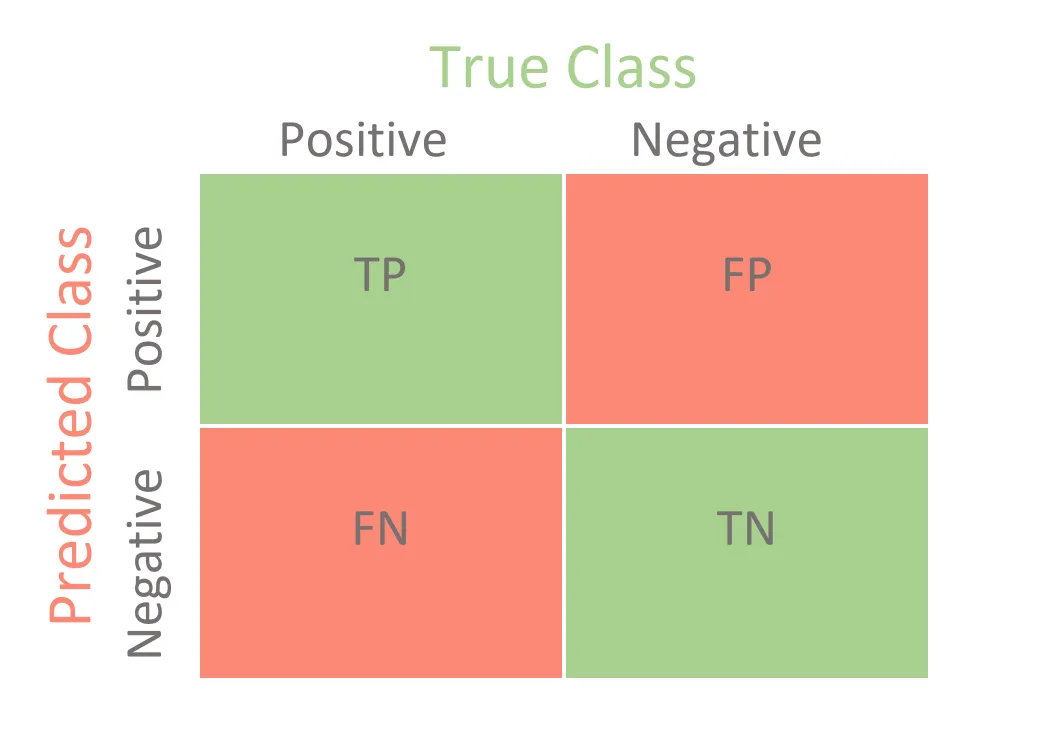!

# Logit function 
- f(x) = log(x/(1-x)) = log(p/(1-p)) = log(odds) //google odds function in probability 
- logit and sigmoid function is the inverse of each other, for example, take the above equation in terms of x by taking e^.. or 10^...


Question]
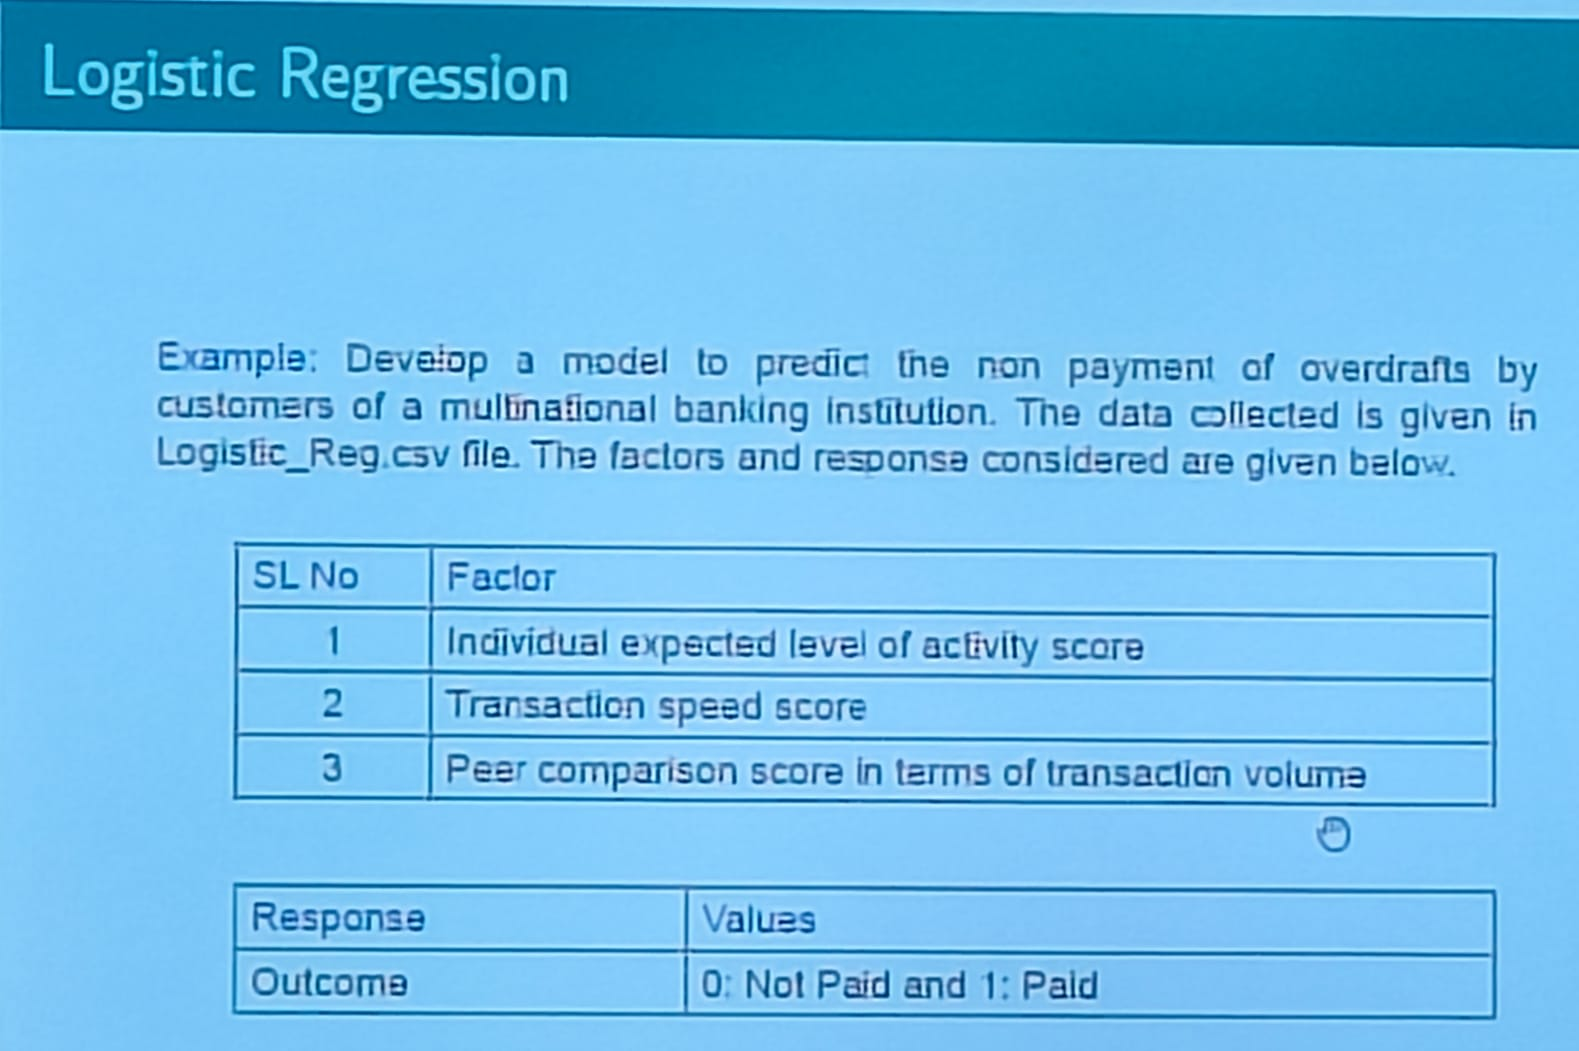

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
mydata_reg = mypd.read_csv("Logistic_reg.csv")
mydata_reg

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
0,6.2,9.3,7.4,1
1,2.6,2.2,8.7,1
2,9.5,1.5,8.2,1
3,2.6,5.0,0.4,0
4,10.0,7.7,7.2,1
...,...,...,...,...
975,6.7,2.7,1.8,0
976,8.3,9.7,5.6,1
977,2.3,0.7,5.5,0
978,0.9,4.8,3.0,0


In [23]:
#to check missing values
mydata_reg.describe()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
count,980.000000,980.00000,980.000000,980.000000
mean,5.042857,5.03602,4.940000,0.723469
std,2.865087,2.92462,2.893484,0.447511
min,0.000000,0.00000,0.000000,0.000000
25%,2.600000,2.40000,2.500000,0.000000
50%,5.100000,5.10000,4.900000,1.000000
75%,7.500000,7.50000,7.400000,1.000000
max,10.000000,10.00000,10.000000,1.000000


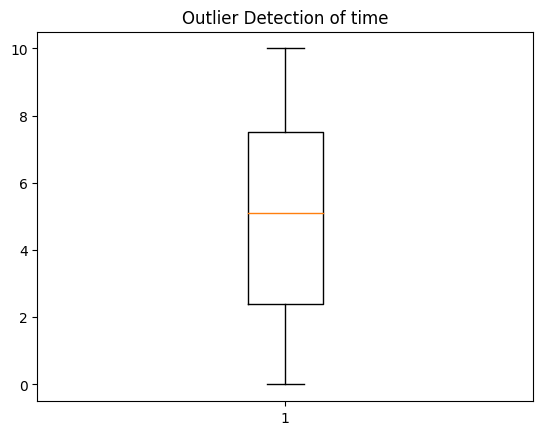

In [24]:
#outlier detection by making boxplot
plt.boxplot(mydata_reg["Tran_Speed_Score"])
plt.title("Outlier Detection of time")
plt.show()

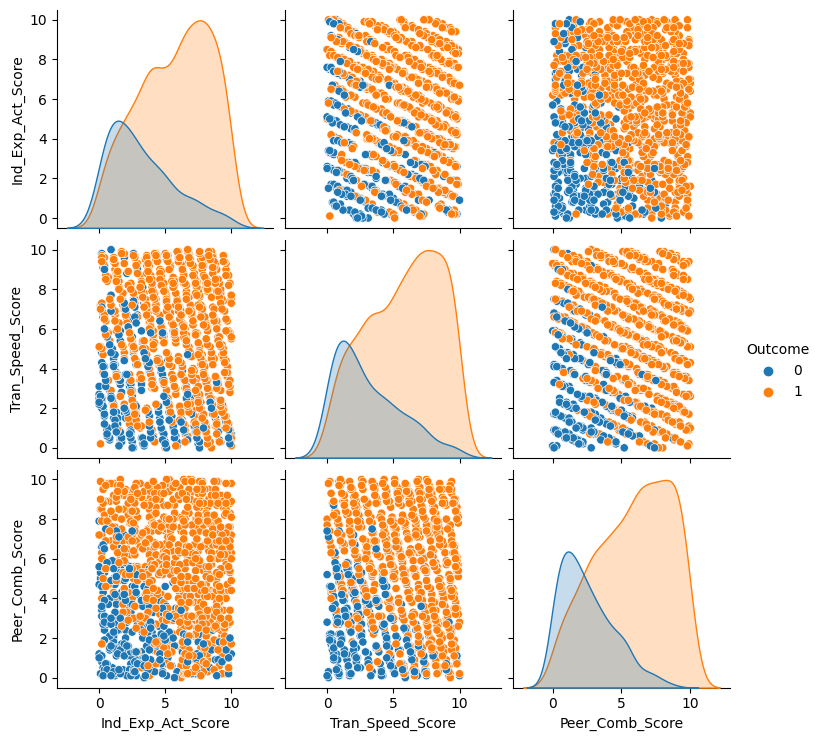

In [25]:
# Preliminary analysis
#by taking a combination of 3 different columns 11,12,13,21,22,23,31,32,33 in x and y axis and taking orange 1 and blue 0 we get the preliminary analysis done
mysb.pairplot(mydata_reg, hue= 'Outcome')
plt.show()

In [26]:
# seperating x and y values 
x = mydata_reg.iloc[:,0:3]
y = mydata_reg.Outcome
print(x)
print(y)

     Ind_Exp_Act_Score  Tran_Speed_Score  Peer_Comb_Score
0                  6.2               9.3              7.4
1                  2.6               2.2              8.7
2                  9.5               1.5              8.2
3                  2.6               5.0              0.4
4                 10.0               7.7              7.2
..                 ...               ...              ...
975                6.7               2.7              1.8
976                8.3               9.7              5.6
977                2.3               0.7              5.5
978                0.9               4.8              3.0
979                2.5               0.0              7.4

[980 rows x 3 columns]
0      1
1      1
2      1
3      0
4      1
      ..
975    0
976    1
977    0
978    0
979    0
Name: Outcome, Length: 980, dtype: int64


In [27]:
#specify the model
mymodel_reg = LogisticRegression(C=1e08) #arguments inside the brackets is not necessary, but putting it is 10^8 will improve accuracy 
#fit the model 
mymodel_reg = mymodel_reg.fit(x,y)
print(mymodel_reg)
#get the coefficients 
coeff = mymodel_reg.coef_
intercept = mymodel_reg.intercept_
print(coeff)
print(intercept)

LogisticRegression(C=100000000.0)
[[2.7957264  2.75315703 3.51531432]]
[-35.50615344]


In [28]:
accuracy = mymodel_reg.score(x,y)
round(accuracy*100,2)

97.14

In [29]:
# Predicted probabilities
predprob = mymodel_reg.predict_proba(x)
predprob

array([[2.88657986e-15, 1.00000000e+00],
       [2.24162471e-04, 9.99775838e-01],
       [3.74296150e-11, 1.00000000e+00],
       ...,
       [9.99596344e-01, 4.03655902e-04],
       [9.99901849e-01, 9.81512294e-05],
       [9.24387621e-01, 7.56123794e-02]])

In [30]:
# Predicted class or category
predclass = mymodel_reg.predict(x)
predclass

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [31]:
# Actual vs Predicted table
mytable = mypd.crosstab(y, predclass)
mytable

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [32]:
predprob = mymodel_reg.predict_proba(x)
predprob

array([[2.88657986e-15, 1.00000000e+00],
       [2.24162471e-04, 9.99775838e-01],
       [3.74296150e-11, 1.00000000e+00],
       ...,
       [9.99596344e-01, 4.03655902e-04],
       [9.99901849e-01, 9.81512294e-05],
       [9.24387621e-01, 7.56123794e-02]])

In [33]:
predprob = mypd.DataFrame(predprob, columns= ["Predicted = 0", "Predicted = 1"])
predprob

,Predicted = 0,Predicted = 1
0,2.886580e-15,1.000000
1,2.241625e-04,0.999776
2,3.742961e-11,1.000000
3,9.999979e-01,0.000002
4,0.000000e+00,1.000000
...,...,...
975,9.531891e-01,0.046811
976,1.554312e-15,1.000000
977,9.995963e-01,0.000404
978,9.999018e-01,0.000098


In [34]:
predclass = mypd.DataFrame(predclass, columns= ["Predicted Class"])
predclass

,Predicted Class
0,1
1,1
2,1
3,0
4,1
...,...
975,0
976,1
977,0
978,0


In [35]:
# Combine output with data
myresult = mydata_reg.join(predclass)
myresult

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class
0,6.2,9.3,7.4,1,1
1,2.6,2.2,8.7,1,1
2,9.5,1.5,8.2,1,1
3,2.6,5.0,0.4,0,0
4,10.0,7.7,7.2,1,1
...,...,...,...,...,...
975,6.7,2.7,1.8,0,0
976,8.3,9.7,5.6,1,1
977,2.3,0.7,5.5,0,0
978,0.9,4.8,3.0,0,0


In [36]:
myresult = myresult.join(predprob)
myresult
# round(myresult.head(15),4)

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class,Predicted = 0,Predicted = 1
0,6.2,9.3,7.4,1,1,2.886580e-15,1.000000
1,2.6,2.2,8.7,1,1,2.241625e-04,0.999776
2,9.5,1.5,8.2,1,1,3.742961e-11,1.000000
3,2.6,5.0,0.4,0,0,9.999979e-01,0.000002
4,10.0,7.7,7.2,1,1,0.000000e+00,1.000000
...,...,...,...,...,...,...,...
975,6.7,2.7,1.8,0,0,9.531891e-01,0.046811
976,8.3,9.7,5.6,1,1,1.554312e-15,1.000000
977,2.3,0.7,5.5,0,0,9.995963e-01,0.000404
978,0.9,4.8,3.0,0,0,9.999018e-01,0.000098


In [37]:
round(myresult.head(15),4)

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class,Predicted = 0,Predicted = 1
0,6.2,9.3,7.4,1,1,0.0000,1.0000
1,2.6,2.2,8.7,1,1,0.0002,0.9998
2,9.5,1.5,8.2,1,1,0.0000,1.0000
3,2.6,5.0,0.4,0,0,1.0000,0.0000
4,10.0,7.7,7.2,1,1,0.0000,1.0000
5,0.2,2.3,3.4,0,0,1.0000,0.0000
6,2.5,2.8,4.6,0,0,0.9904,0.0096
7,0.4,1.6,5.3,0,0,1.0000,0.0000
8,0.2,9.8,0.8,0,0,0.9943,0.0057
9,8.9,6.1,9.2,1,1,0.0000,1.0000


In [38]:
# Generalizability check - Cross validation
myscore = cross_val_score(mymodel_reg, x, y, scoring= 'accuracy', cv = 5) #takes only 5 columns as cv=5
myscore

array([0.94387755, 0.96428571, 0.98469388, 0.96938776, 0.9744898 ])

In [39]:
cv_accuracy = myscore.mean()
round(cv_accuracy*100,2)

96.73

In [40]:
#Getting Confusion matrix by the package 'confusion matrix' from sklearn
mymatrix = confusion_matrix(y, predclass)
mymatrix

array([[257,  14],
       [ 14, 695]], dtype=int64)

In [41]:
myreport = classification_report(y, predclass)
print(myreport)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       271
           1       0.98      0.98      0.98       709

    accuracy                           0.97       980
   macro avg       0.96      0.96      0.96       980
weighted avg       0.97      0.97      0.97       980



# Naive Bayes Algorithm
- If you have only two classes like high/low, 1/0, use Bernouille Naive Bayes
- If you know your data is normally distributed (bell shaped curve), use Gausian Naive Bayes
- If there are more than two classes, like blue, red, green then use Multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
mydata_nb = mypd.read_csv("Iris_data.csv")
mydata_nb

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
96,145,6.7,3.3,5.7,2.5,2
97,146,6.7,3.0,5.2,2.3,2
98,147,6.3,2.5,5.0,1.9,2
99,149,6.2,3.4,5.4,2.3,2


In [44]:
mymodel_nb = GaussianNB()
x = mydata_nb.iloc[:,1:5]
y = mydata_nb.Species
mymodel_nb.fit(x,y)
predclass = mymodel_nb.predict(x)
predclass

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [45]:
predclass = mypd.DataFrame(predclass, columns= ["Predicted Class"])
predclass

,Predicted Class
0,0
1,0
2,0
3,0
4,0
...,...
96,2
97,2
98,2
99,2


In [46]:
# #Actual Vs Predicted
# mytable =mypd.crosstab(y, predclass[1])
# mytable

In [47]:
myresult = mydata_reg.join(predclass)
myresult

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class
0,6.2,9.3,7.4,1,0.0
1,2.6,2.2,8.7,1,0.0
2,9.5,1.5,8.2,1,0.0
3,2.6,5.0,0.4,0,0.0
4,10.0,7.7,7.2,1,0.0
...,...,...,...,...,...
975,6.7,2.7,1.8,0,NaN
976,8.3,9.7,5.6,1,NaN
977,2.3,0.7,5.5,0,NaN
978,0.9,4.8,3.0,0,NaN


In [49]:
# #for splitting the data for traning and splitting
# from sklearn.model